# Pourbaix Diagram Plotting

In [1]:
from pourbaix_plot import plot_pourbaix, plot_dG_vs_U, plot_dG_vs_pH

import matplotlib.pyplot as plt
import os

This Jupyter Notebook provides a more detailed usage of the functions and step-by-step examples to reproduce the figures from the paper.

# 1. Getting Started

The `plot_pourbaix()` function can be used to plot a Pourbaix diagram from an input data file. An ax (plt.Axes) object can be passed if desired to put on a pre-existing figure, otherwhise, it will generate one from zero. The function will handle automatically the labeling of each phase, although labels can be turned off (labels=False) and put them manually.



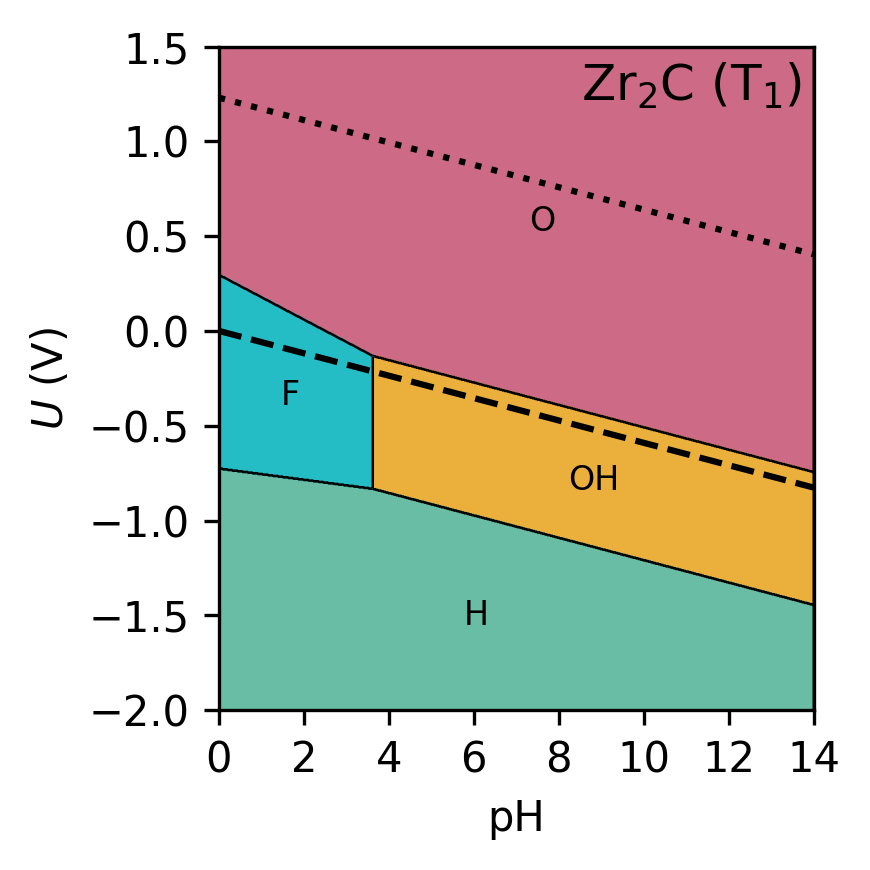

In [2]:
fig, ax = plt.subplots(1,1,figsize=(3, 3),dpi=300)
ax = plot_pourbaix('pbe0/data_zr_t.txt',ax=ax,output=None,labels=True,title="Zr$_2$C (T$_1$)")


You can choose to exclude specific phases by passing them, as a list, in the exclude argument:

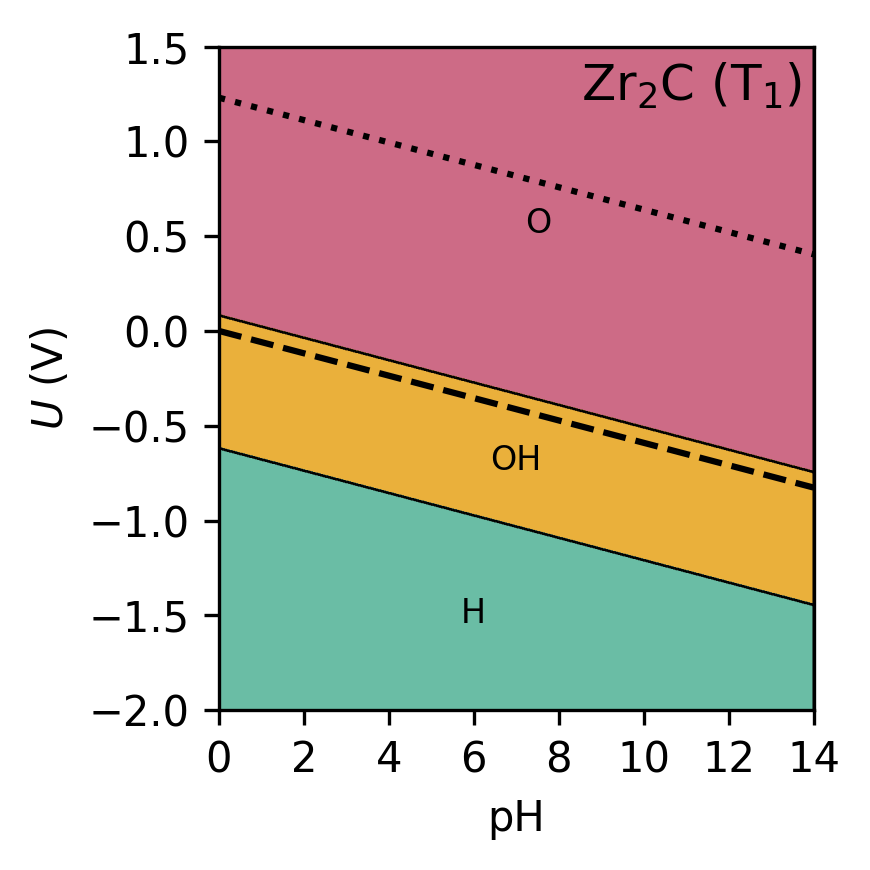

In [3]:
fig, ax = plt.subplots(1,1,figsize=(3, 3),dpi=300)
ax = plot_pourbaix('pbe0/data_zr_t.txt',ax=ax,output=None,labels=True,exclude=["F"],title="Zr$_2$C (T$_1$)")

A lot of keyword arguments can be passed to the function to format and style the plot. See the correspondent docstring.

In [3]:
help(plot_pourbaix)

Help on function plot_pourbaix in module pourbaix_plot:

plot_pourbaix(
    file,
    ax=None,
    output=None,
    N=100,
    exclude=None,
    title=None,
    shift=(0, 0),
    add_contour=True,
    legend=False,
    labels=True,
    labelsize=8,
    **kwargs
)
    Plots the Pourbaix diagram given a data file.

    This function calculates the most stable surface phase across a grid of pH
    and Potential (U) values based on Gibbs free energy. It visualizes these
    phases as a colored map, adds Hydrogen (HER) and Oxygen (OER) evolution lines,
    and includes smart label placement.

    Parameters
    ----------
    file : str
        Path to the data file. Expected columns: [dG0, vH, ve, label].
    ax : plt.Axes, optional
        Existing axes to plot on. If None, a new figure is created.
    output : str, optional
        Filename/path to save the figure (e.g., 'diagram.png').
    N : int, default 1000
        Resolution of the pH and Potential grid (N x N).
    exclude : list 

Similarly, the `plot_dG_vs_U` and `plot_dG_vs_pH` functions can be used to plot a "slice" of the Pourbaix diagram, given a fixed $\mathrm{pH}$ or $U$, respectively:

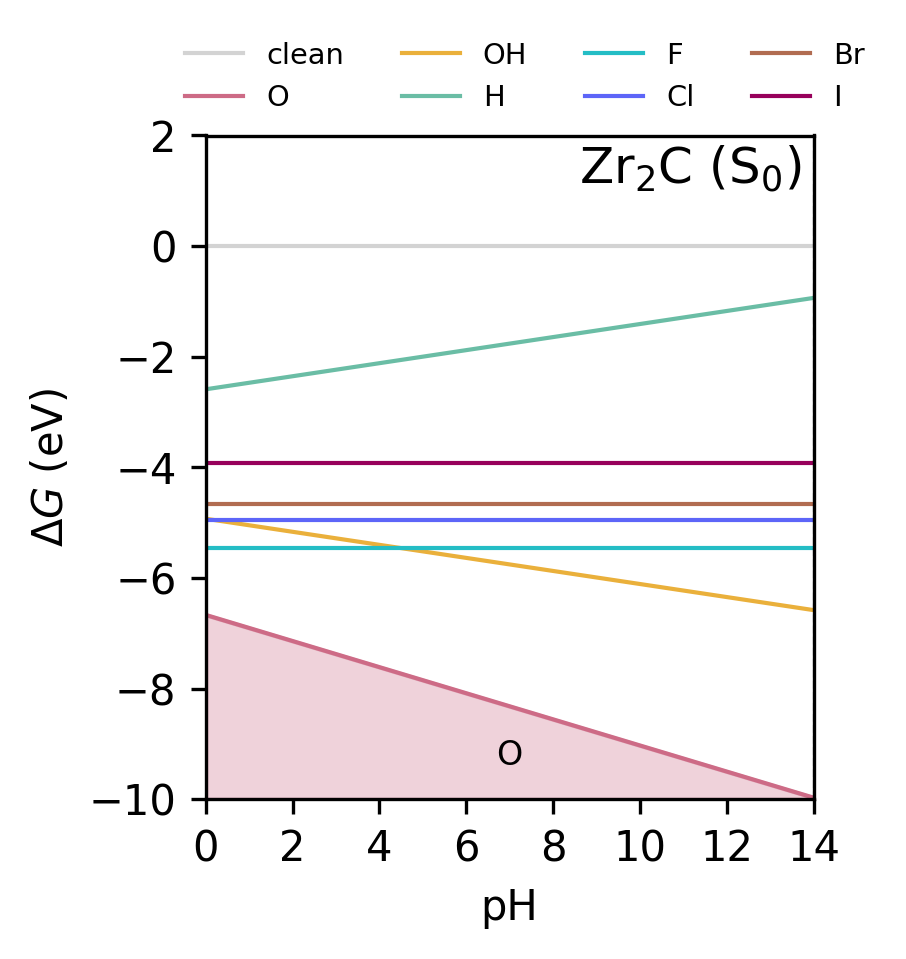

In [15]:
fig, ax = plt.subplots(1,1,figsize=(3, 3),dpi=300)
ax = plot_dG_vs_pH('pbe0/data_zr_s.txt', U=0, ax=ax, output=None, title="Zr$_2$C (S$_0$)", fill=True, labelsize=8)

# Put legend on top
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels,
           loc="upper center", ncol=4, fontsize="x-small",
           frameon=False, bbox_to_anchor=(0.6, 1.065))

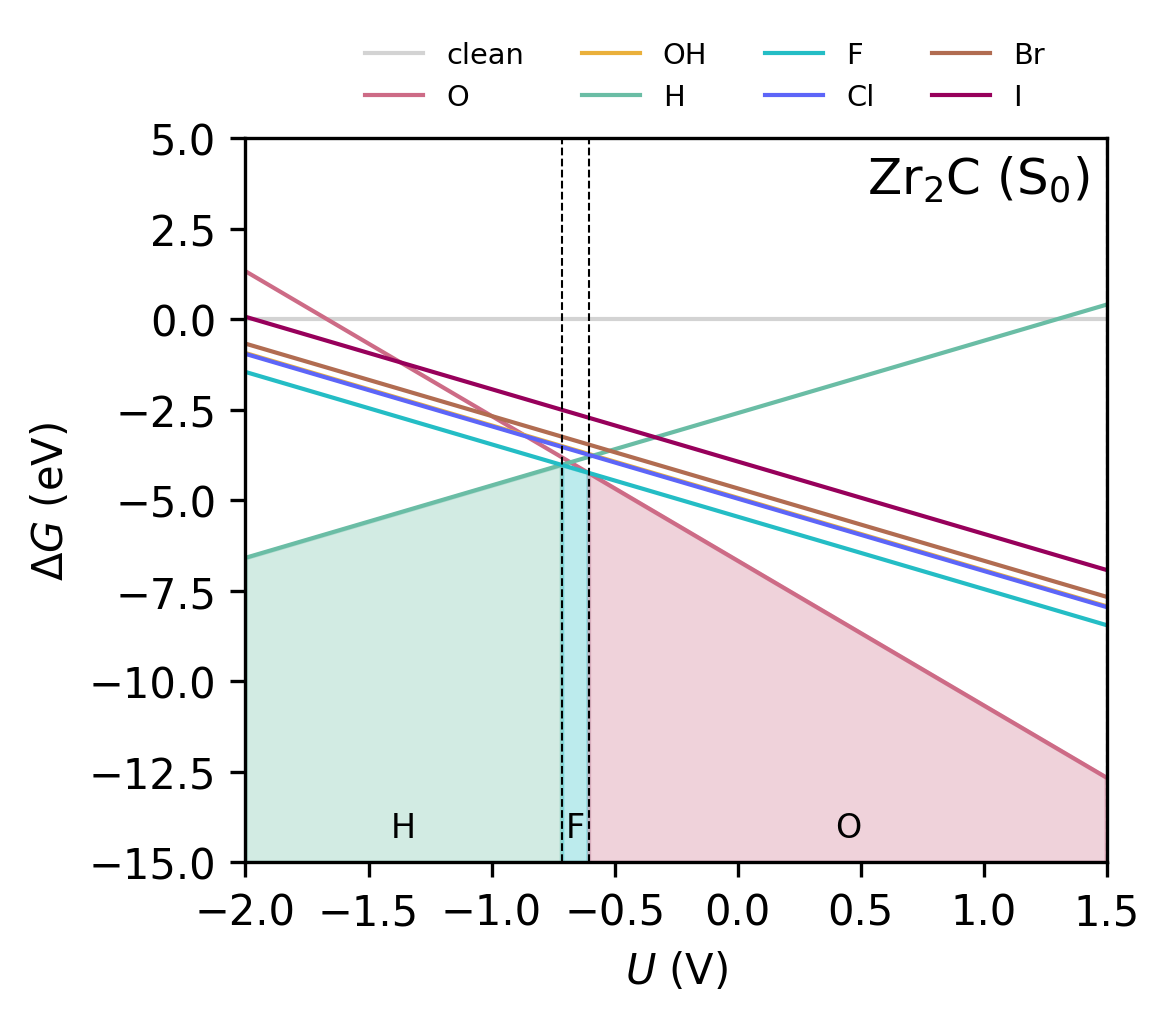

In [19]:
fig, ax = plt.subplots(1,1,figsize=(4, 3.2),dpi=300)
ax = plot_dG_vs_U('pbe0/data_zr_s.txt', pH=0, ax=ax, output=None, title="Zr$_2$C (S$_0$)", fill=True, labelsize=8)

# Put legend on top
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels,
           loc="upper center", ncol=4, fontsize="x-small",
           frameon=False, bbox_to_anchor=(0.6, 1.065))

As before, a lot of keyword arguments can be passed to the function to format and style the plot. See the correspondent docstring:

In [20]:
help(plot_dG_vs_pH)

Help on function plot_dG_vs_pH in module pourbaix_plot:

plot_dG_vs_pH(
    file,
    U=0,
    ax=None,
    output=None,
    N=1000,
    title=None,
    legend=False,
    fill=True,
    labelsize=8,
    **kwargs
)
    Plot ΔG vs pH for different phases at a fixed potential U.

    This function visualizes the stability of different surface phases/terminations
    by plotting ΔG as a function of pH. It identifies the most stable phase
    (the one with the lowest ΔG) for every potential value, highlights these regions
    with color fills, and adds phase labels.

    Parameters
    ----------
    file : str
        Path to the data file. Expected columns: [dG0, vH, ve, label].
    ax : plt.Axes, optional
        Existing axes to plot on. If None, a new figure is created.
    U  : float, default 0
        The fixed U value at which to calculate free energies.
    output : str, optional
        Filename/path to save the figure (e.g., 'dg_vs_ph.png').
    N : int, default 1000
        Reso

# 2. Reproducing images from paper

### PBE Pourbaix Diagrams

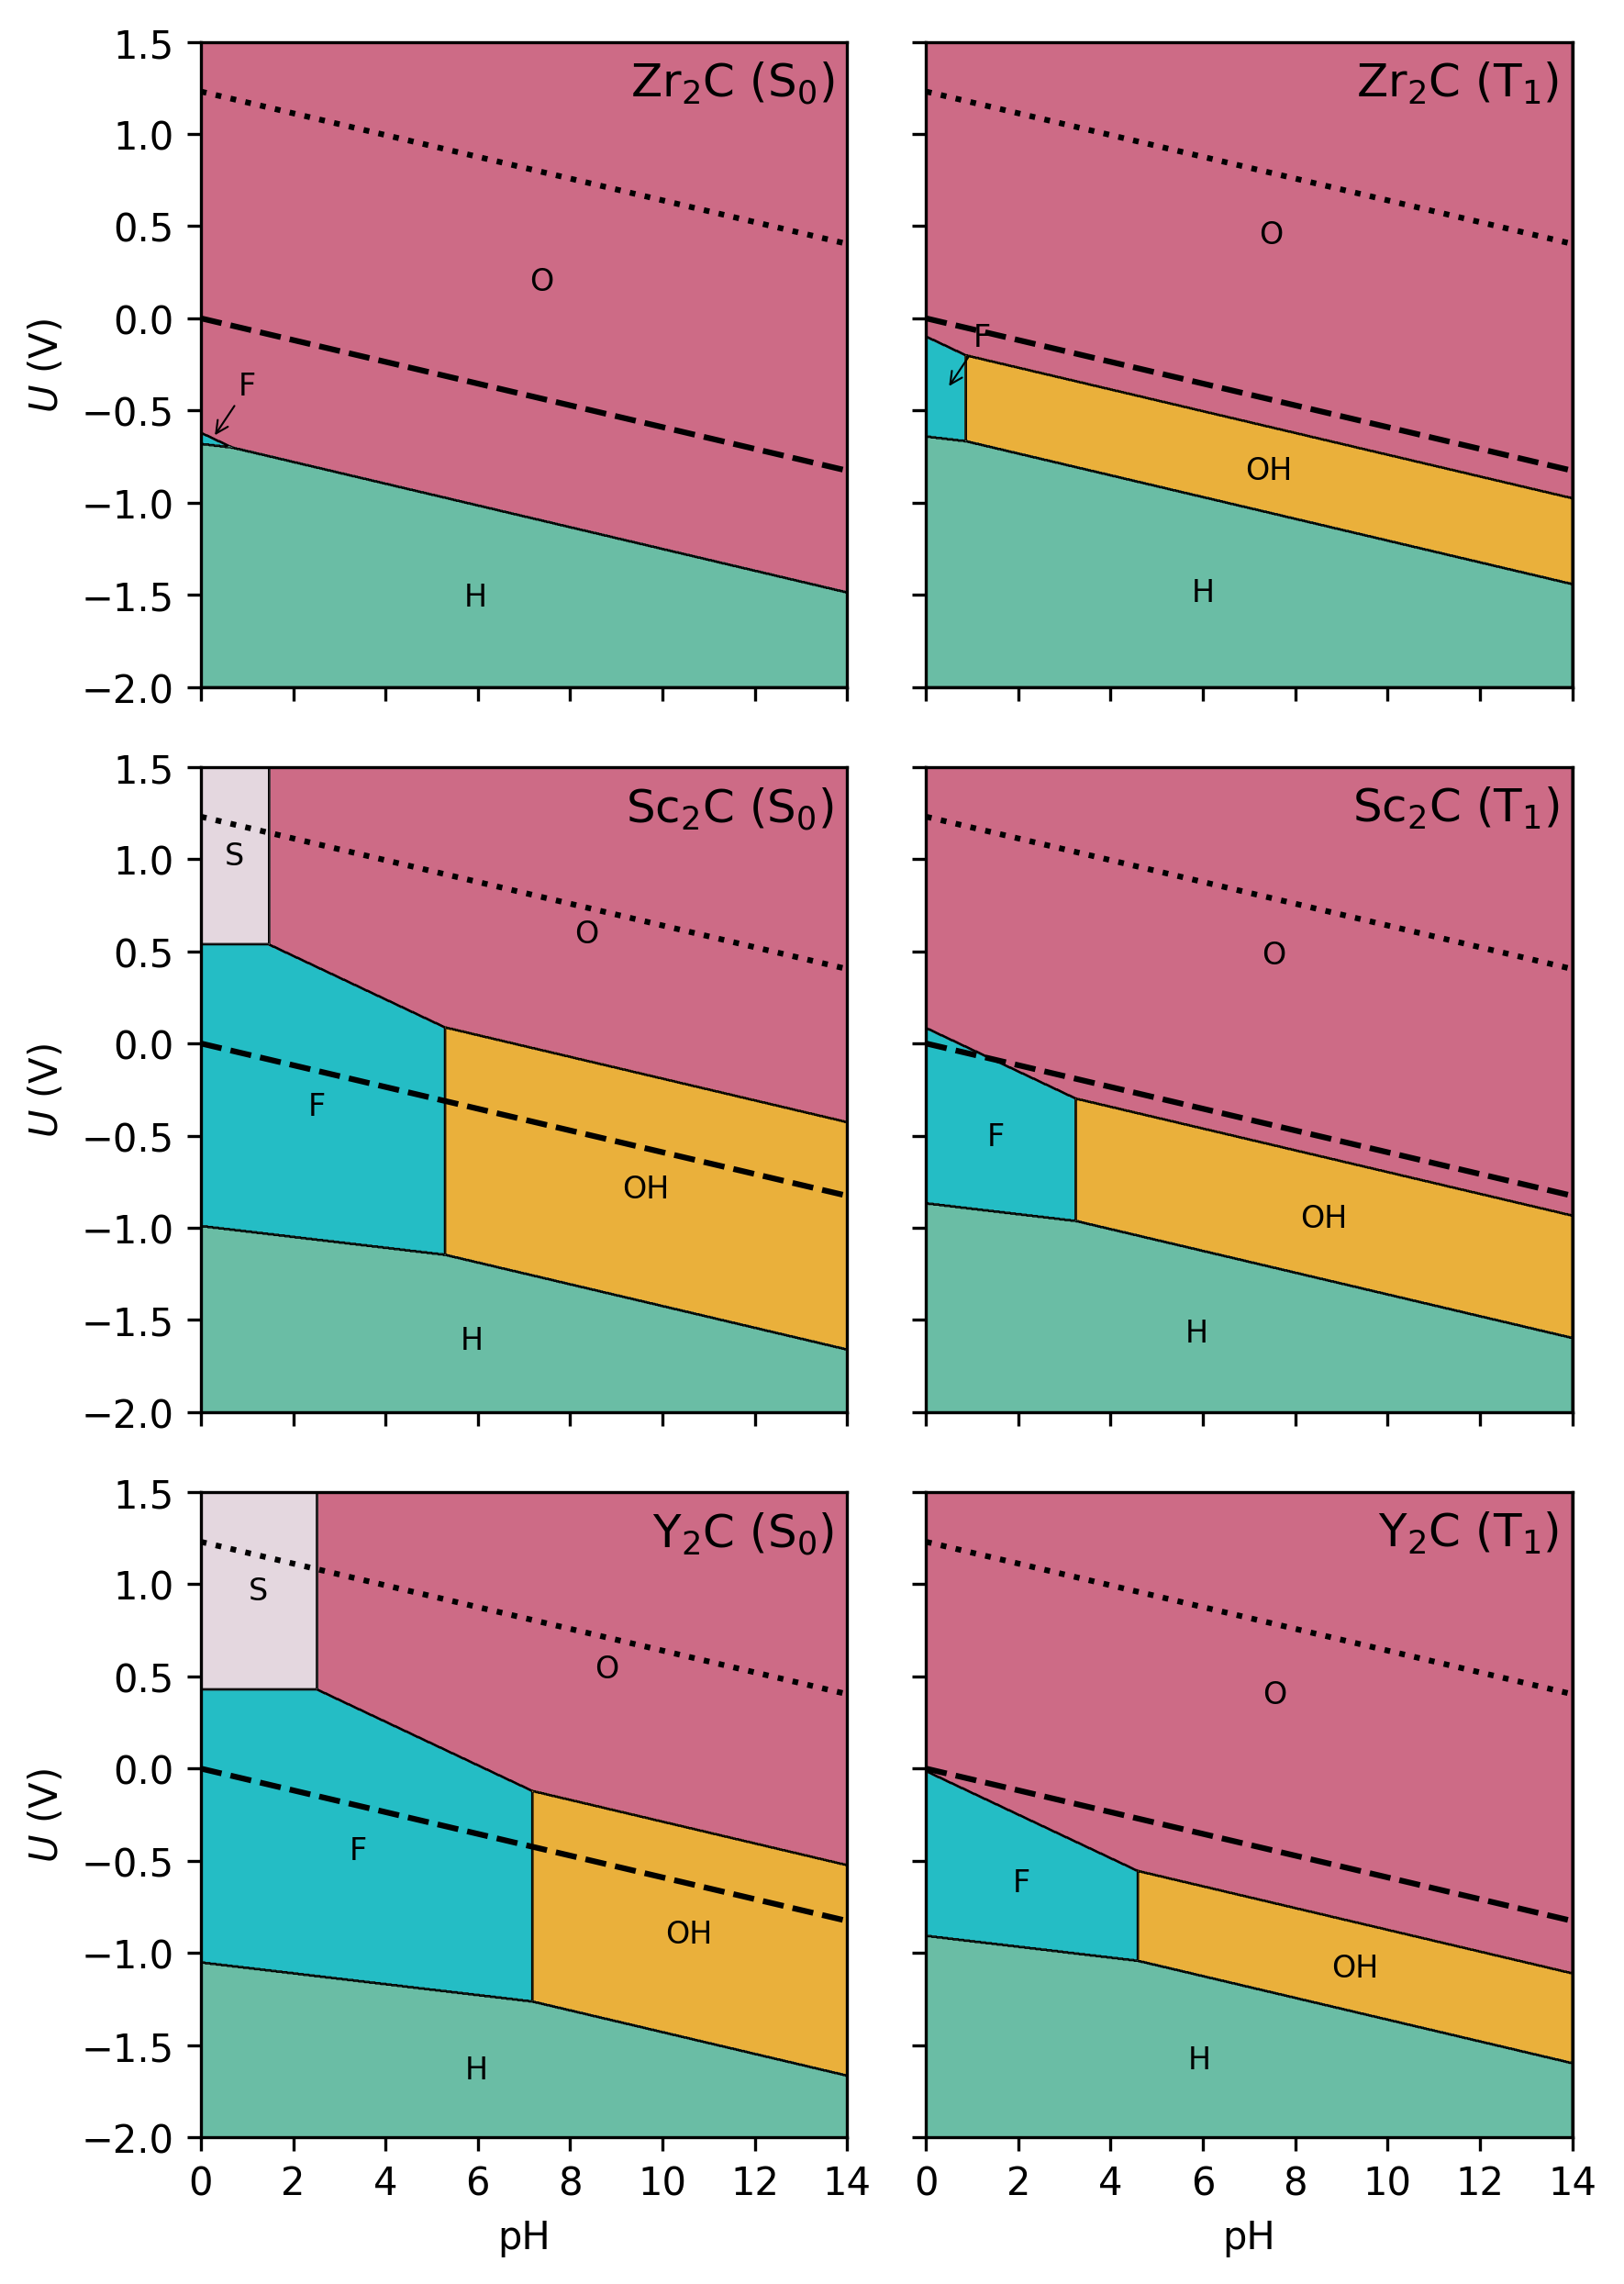

In [23]:
os.chdir("pbe/")

fig, ax = plt.subplots(3,2,figsize=(3*2, 2.8*3),sharey=True,sharex=True,dpi=300)
plot_pourbaix('data_zr_s.txt',ax=ax[0,0],xlabel=None,title="Zr$_2$C (S$_0$)")
plot_pourbaix('data_zr_t.txt',ax=ax[0,1],xlabel=None,ylabel=None,title="Zr$_2$C (T$_1$)")
plot_pourbaix('data_sc_s.txt',ax=ax[1,0],xlabel=None,title="Sc$_2$C (S$_0$)")
plot_pourbaix('data_sc_t.txt',ax=ax[1,1],xlabel=None,ylabel=None,title="Sc$_2$C (T$_1$)")
plot_pourbaix('data_y_s.txt',ax=ax[2,0],title="Y$_2$C (S$_0$)")
plot_pourbaix('data_y_t.txt',ax=ax[2,1],ylabel=None,title="Y$_2$C (T$_1$)")

os.chdir("..")

fig.savefig("./img/pourbaix_pbe.png", dpi=600)


### PBE0 Pourbaix Diagrams

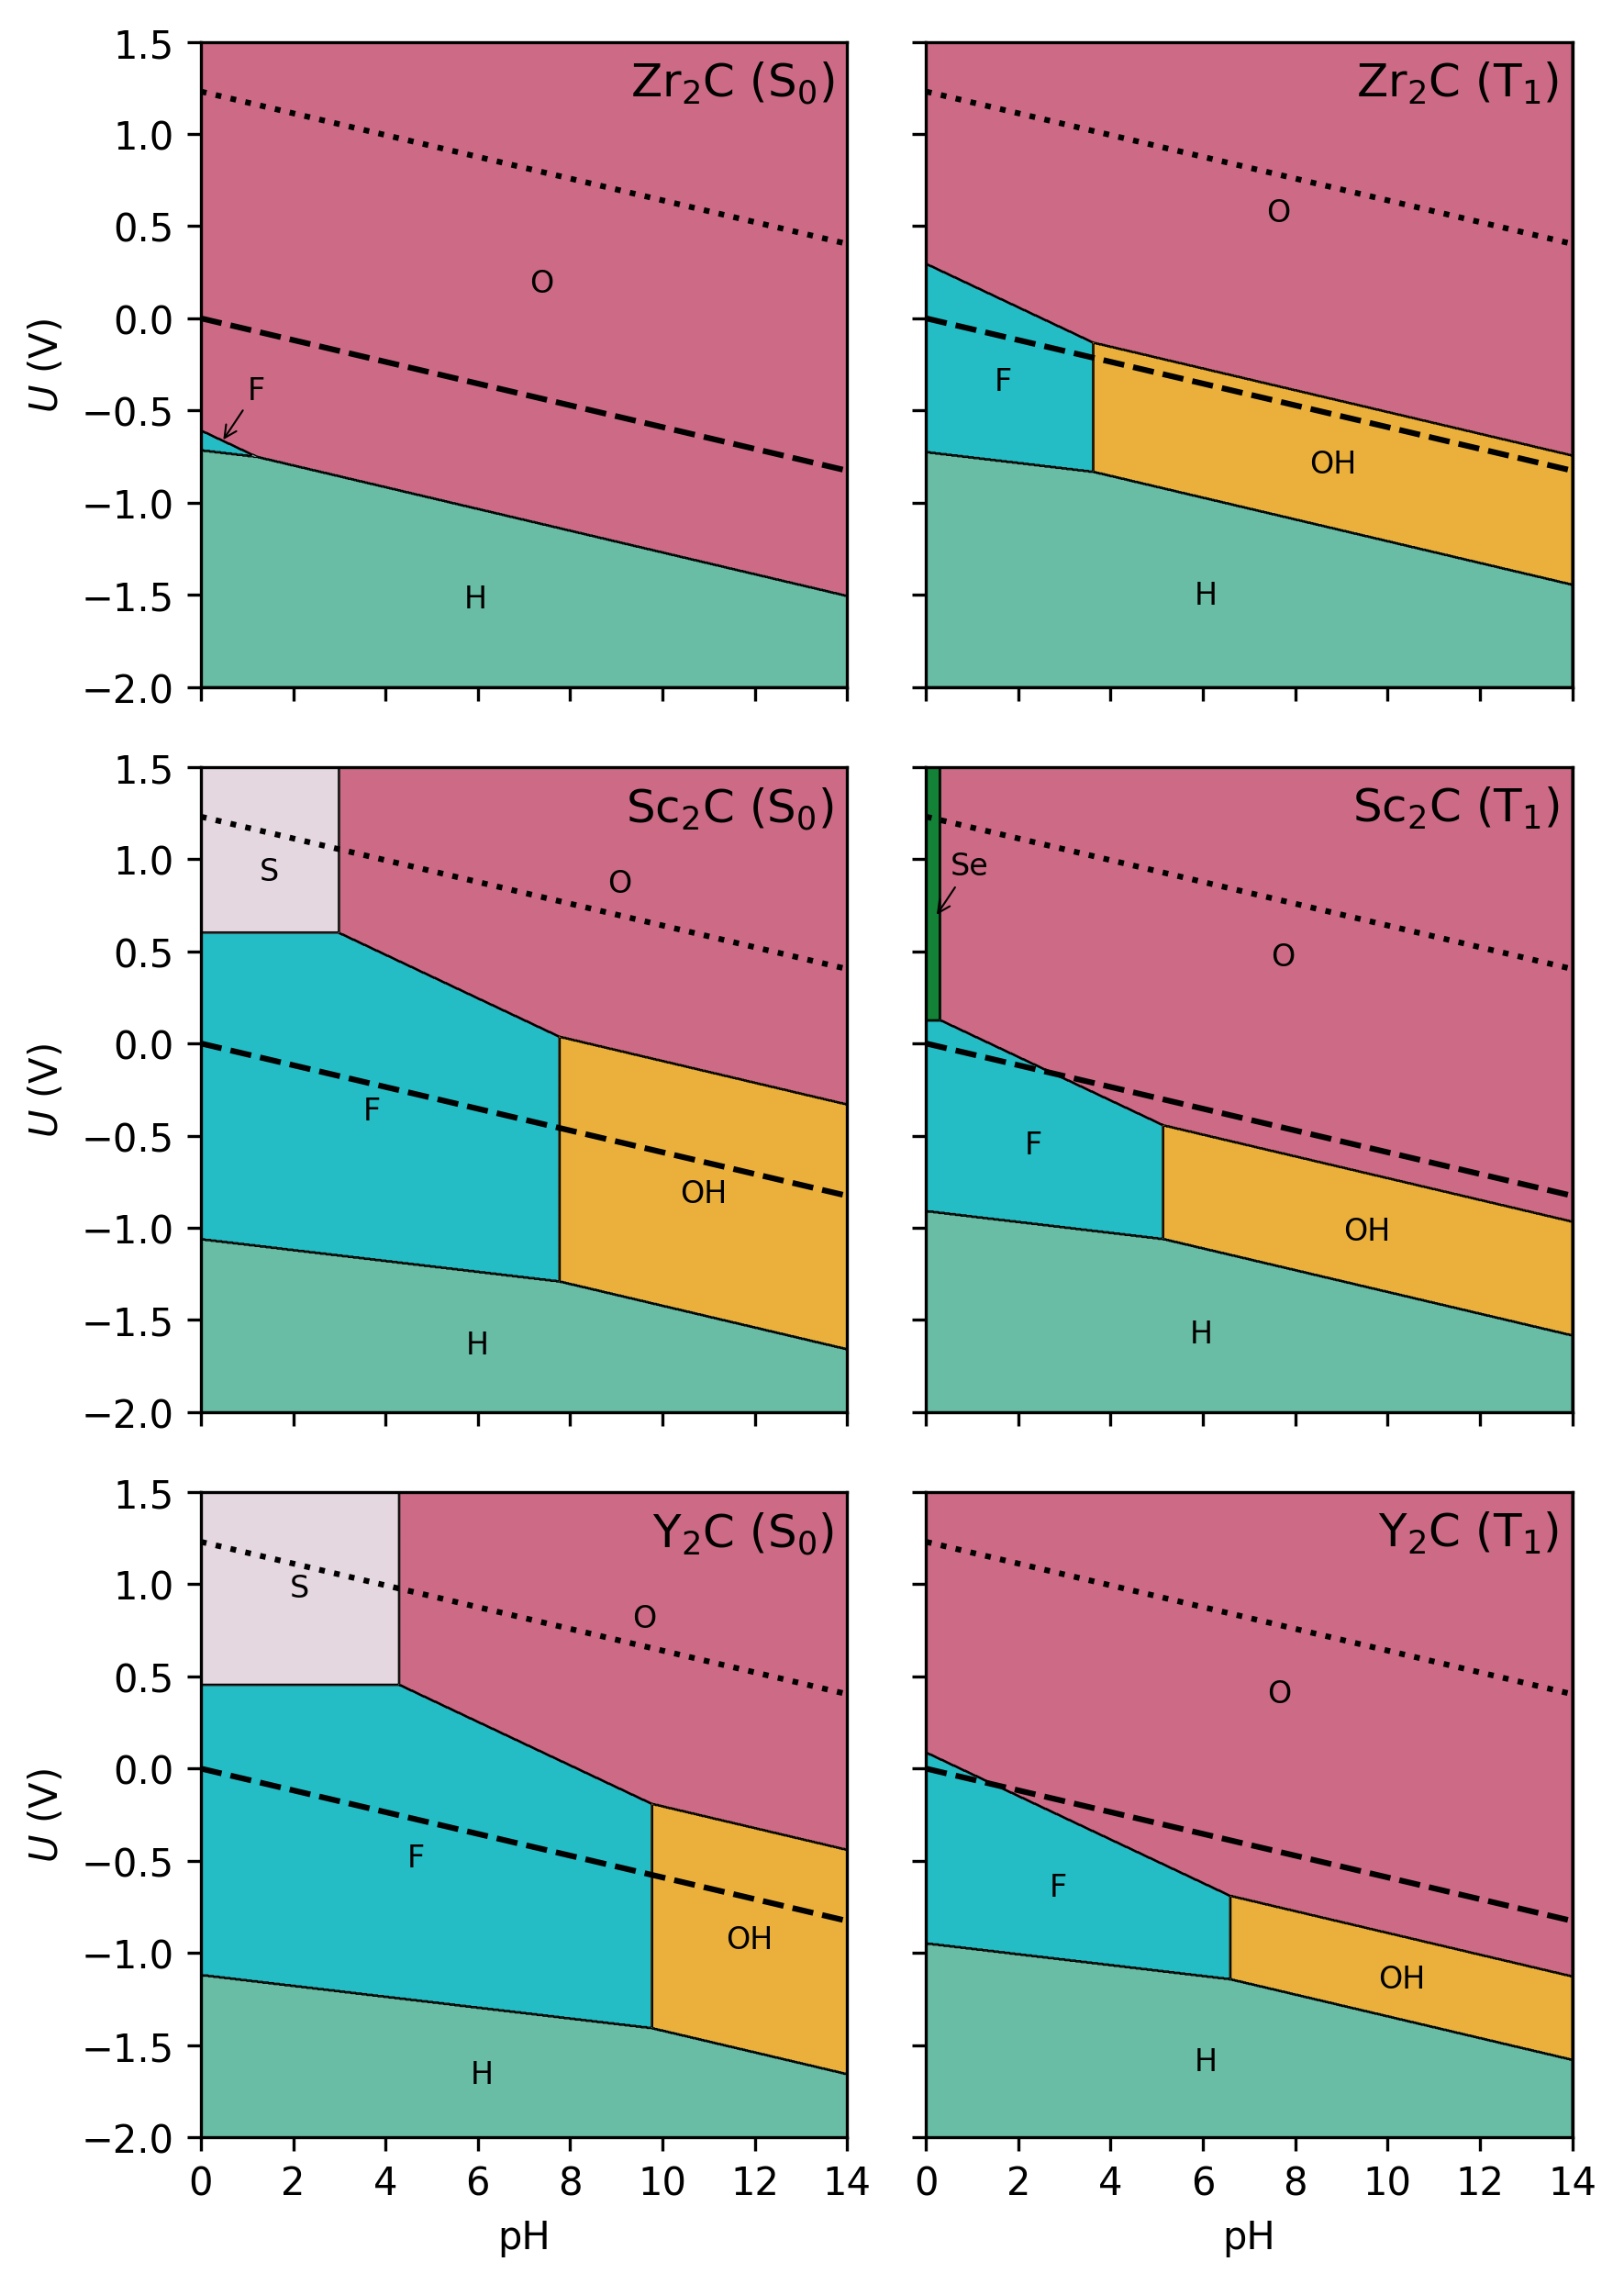

In [24]:
os.chdir("pbe0/")

fig, ax = plt.subplots(3,2,figsize=(3*2, 2.8*3),sharey=True,sharex=True,dpi=300)
plot_pourbaix('data_zr_s.txt',ax=ax[0,0],xlabel=None,title="Zr$_2$C (S$_0$)")
plot_pourbaix('data_zr_t.txt',ax=ax[0,1],xlabel=None,ylabel=None,title="Zr$_2$C (T$_1$)")
plot_pourbaix('data_sc_s.txt',ax=ax[1,0],xlabel=None,title="Sc$_2$C (S$_0$)")
plot_pourbaix('data_sc_t.txt',ax=ax[1,1],xlabel=None,ylabel=None,title="Sc$_2$C (T$_1$)")
plot_pourbaix('data_y_s.txt',ax=ax[2,0],title="Y$_2$C (S$_0$)")
plot_pourbaix('data_y_t.txt',ax=ax[2,1],ylabel=None,title="Y$_2$C (T$_1$)")

os.chdir("..")

fig.savefig("./img/pourbaix_pbe0.png", dpi=600)

### F-Free (exclude -F) Pourbaix Diagram (PBE0)

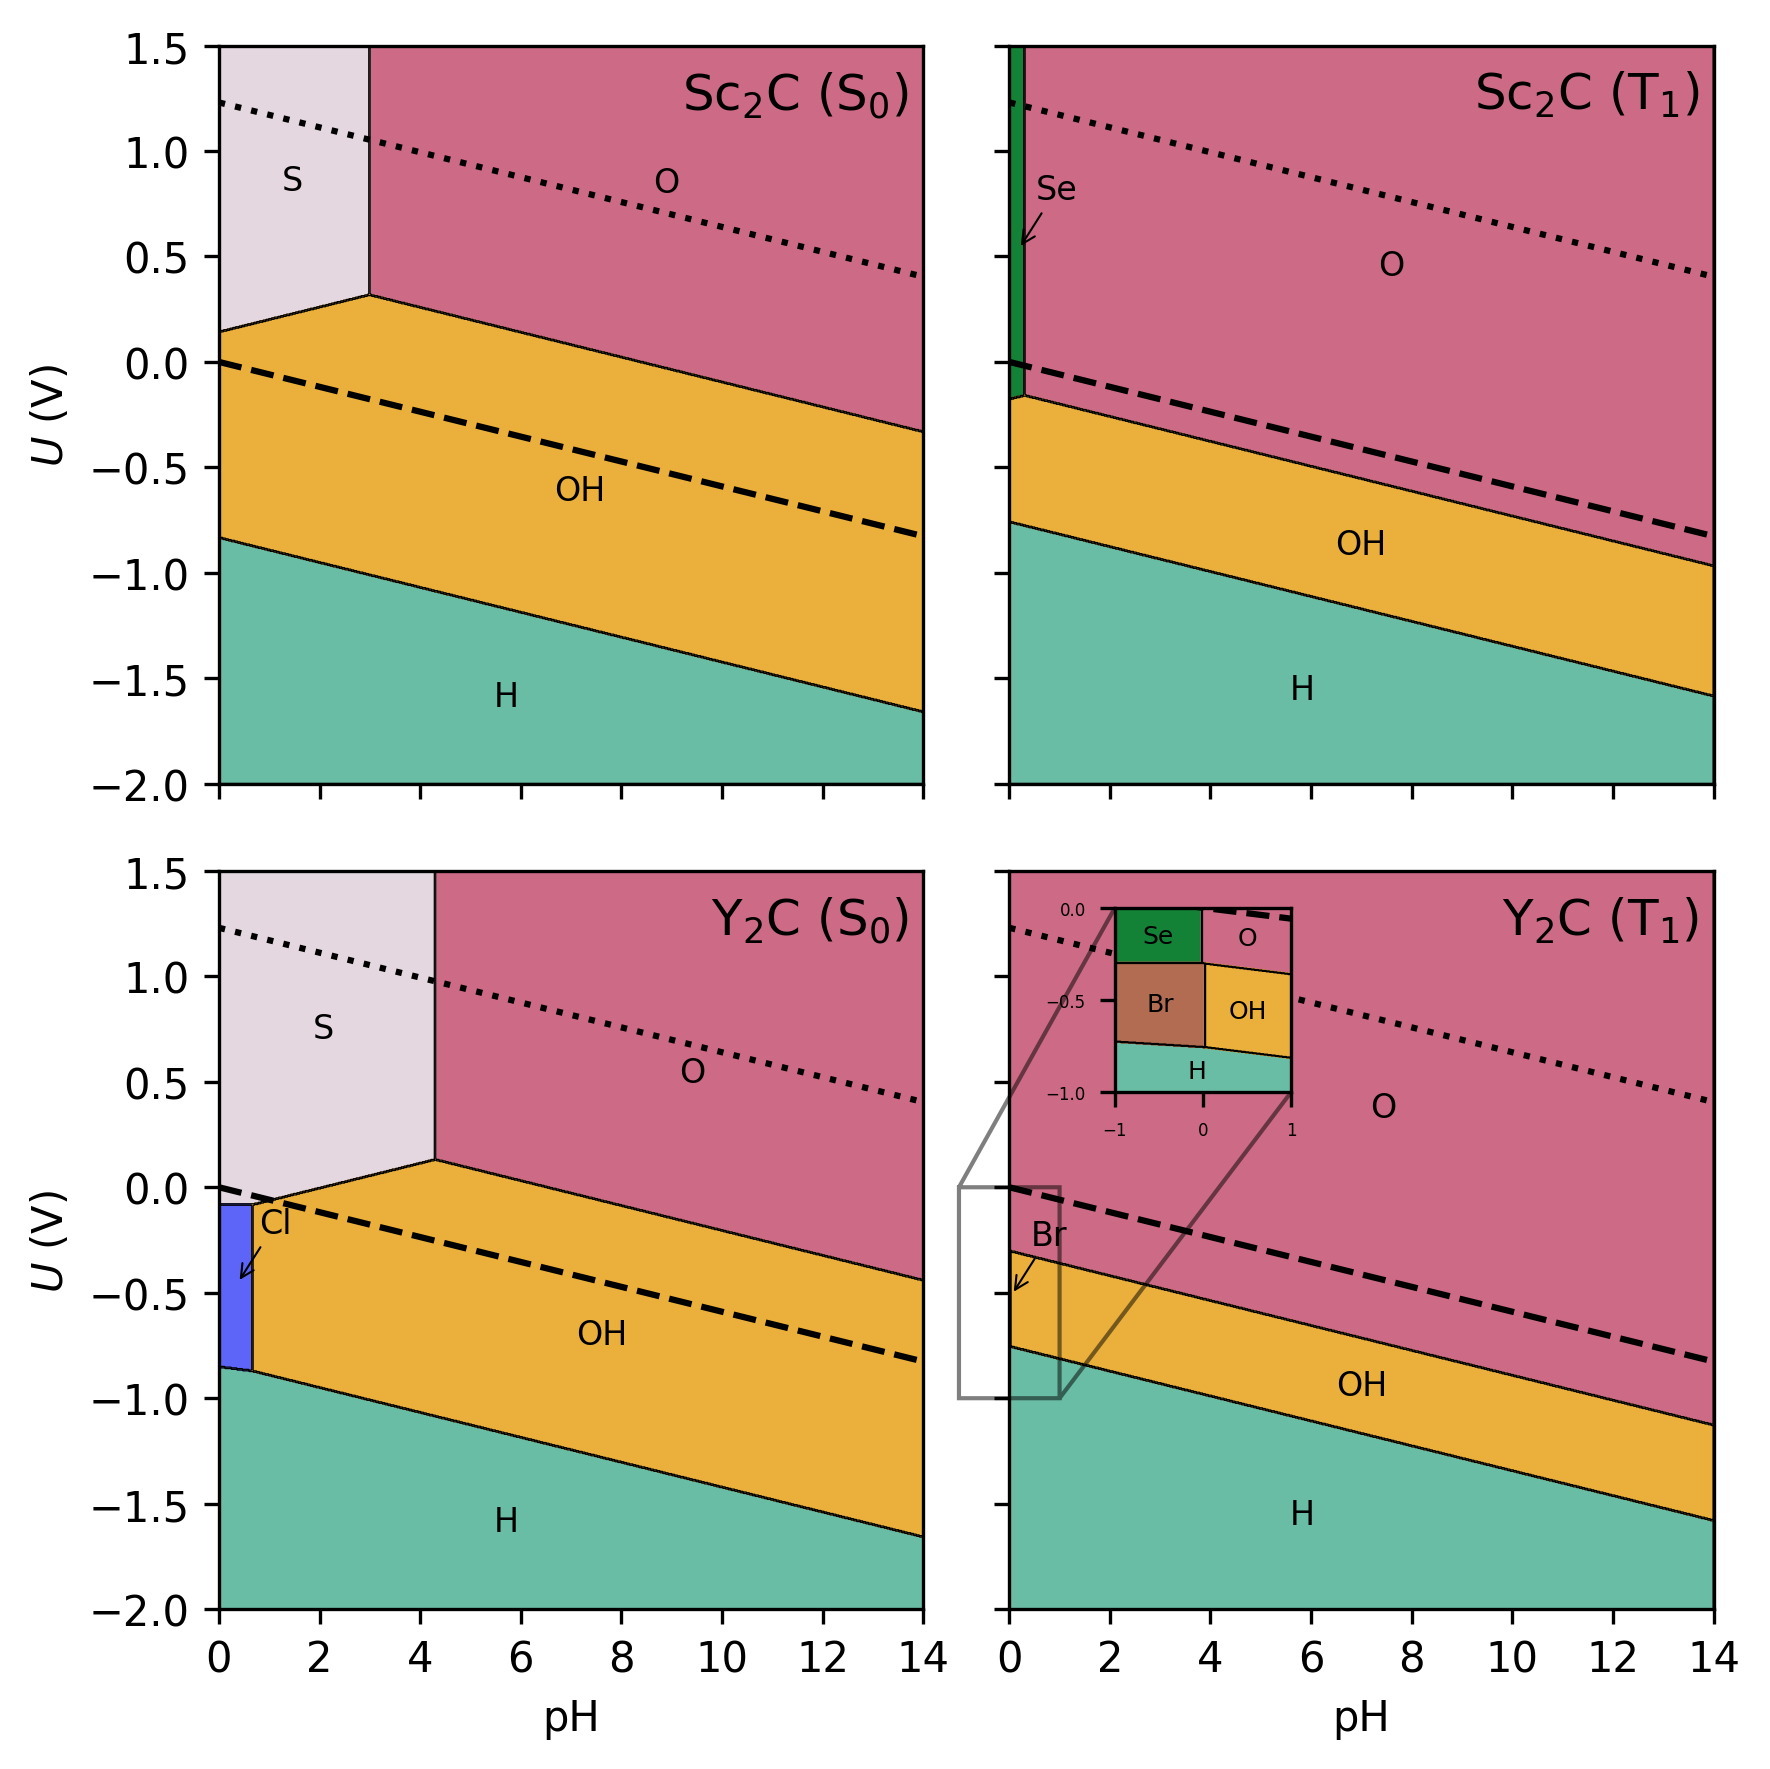

In [4]:
exclude = ["F"]

os.chdir("pbe0/")
fig, ax = plt.subplots(2,2,figsize=(3*2, 3*2),sharey=True,sharex=True,dpi=300)
plot_pourbaix('data_sc_s.txt',ax=ax[0,0],exclude=exclude,xlabel=None,title="Sc$_2$C (S$_0$)")
plot_pourbaix('data_sc_t.txt',ax=ax[0,1],exclude=exclude,xlabel=None,ylabel=None,title="Sc$_2$C (T$_1$)")
plot_pourbaix('data_y_s.txt',ax=ax[1,0],exclude=exclude,title="Y$_2$C (S$_0$)")
plot_pourbaix('data_y_t.txt',ax=ax[1,1],exclude=exclude,ylabel=None,title="Y$_2$C (T$_1$)")

ax_inset = ax[1,1].inset_axes([0.15,0.7,0.25,0.25])
ax_inset.tick_params(labelsize=4)
plot_pourbaix('data_y_t.txt', ax=ax_inset, N=400, exclude=exclude, xlabel=None, ylabel=None, labelsize=6, title="",nlocator_x=1, xlim=(-1,1),ylim=(-1,0))
inset_indicator = ax[1,1].indicate_inset_zoom(ax_inset, edgecolor="black", alpha=0.5)

os.chdir("..")

fig.savefig("./img/pourbaix_Ffree.png", dpi=600)

### No HF (exclude -H, -O, -OH, -F) Pourbaix Diagram (PBE0)

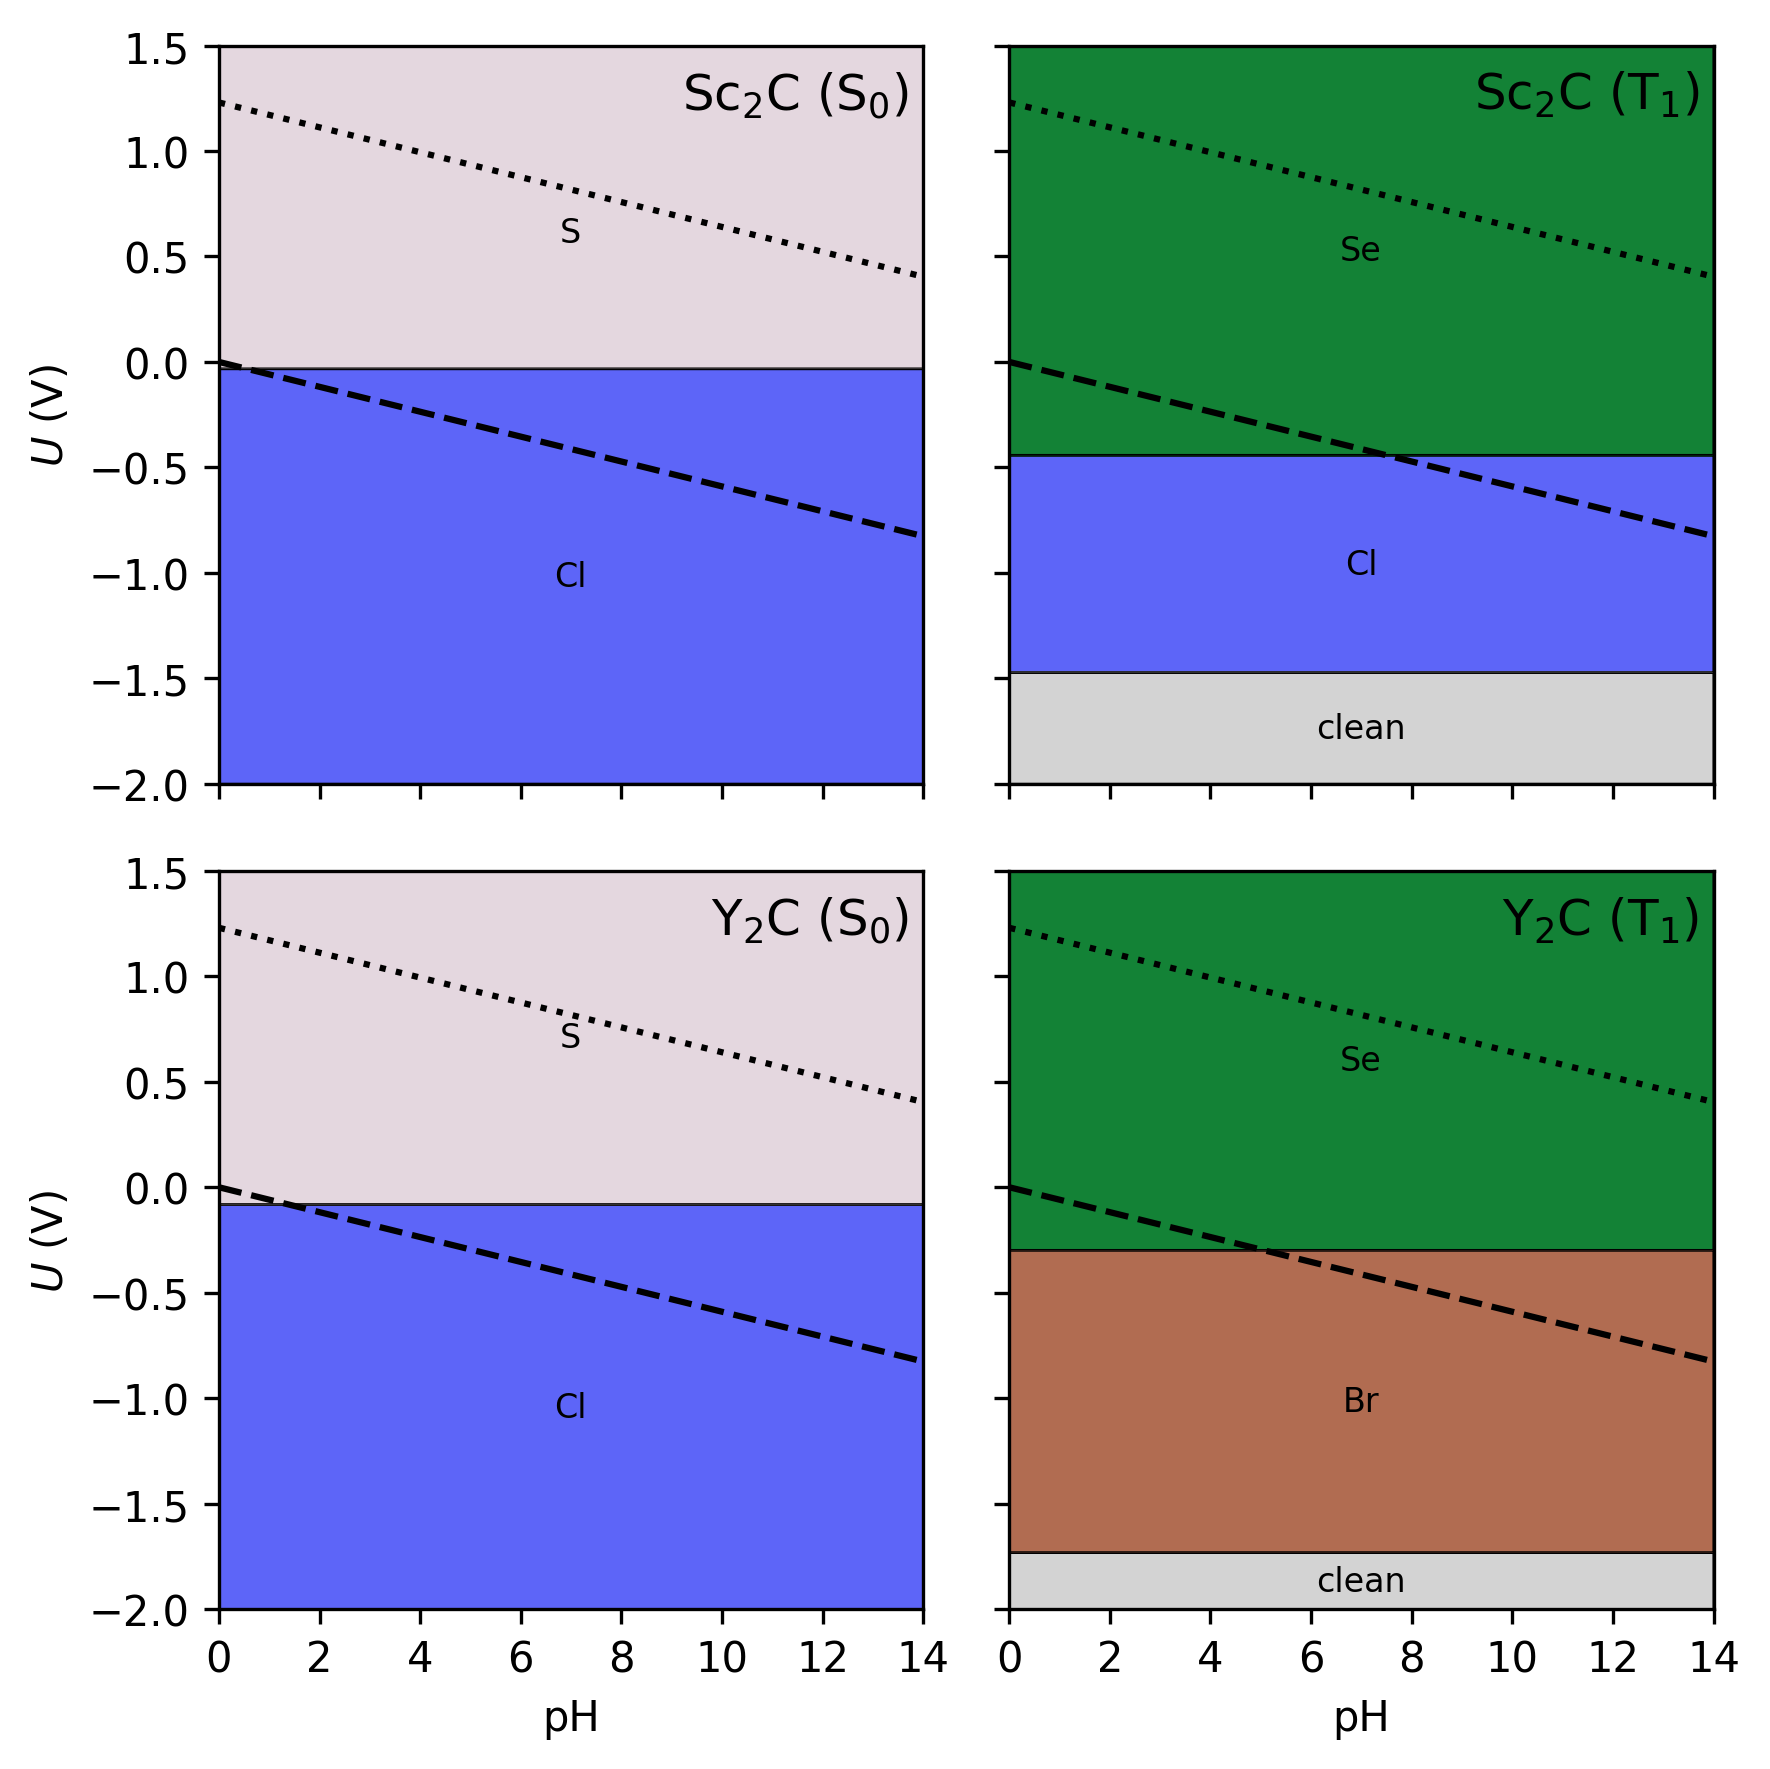

In [16]:
exclude = ["H", "O", "OH", "F"]
os.chdir("pbe0/")

fig, ax = plt.subplots(2,2,figsize=(3*2, 3*2),sharey=True,sharex=True,dpi=300)
plot_pourbaix('data_sc_s.txt',ax=ax[0,0],exclude=exclude,legend=False,xlabel=None,title="Sc$_2$C (S$_0$)")
plot_pourbaix('data_sc_t.txt',ax=ax[0,1],exclude=exclude,xlabel=None,ylabel=None,title="Sc$_2$C (T$_1$)")
plot_pourbaix('data_y_s.txt',ax=ax[1,0],exclude=exclude,title="Y$_2$C (S$_0$)")
plot_pourbaix('data_y_t.txt',ax=ax[1,1],exclude=exclude,ylabel=None,title="Y$_2$C (T$_1$)")

os.chdir("..")

fig.savefig("./img/pourbaix_noHF.png", dpi=600)

### $\Delta G$ $vs.$ $U$ Plots (PBE0) at fixed $\mathrm{pH}$

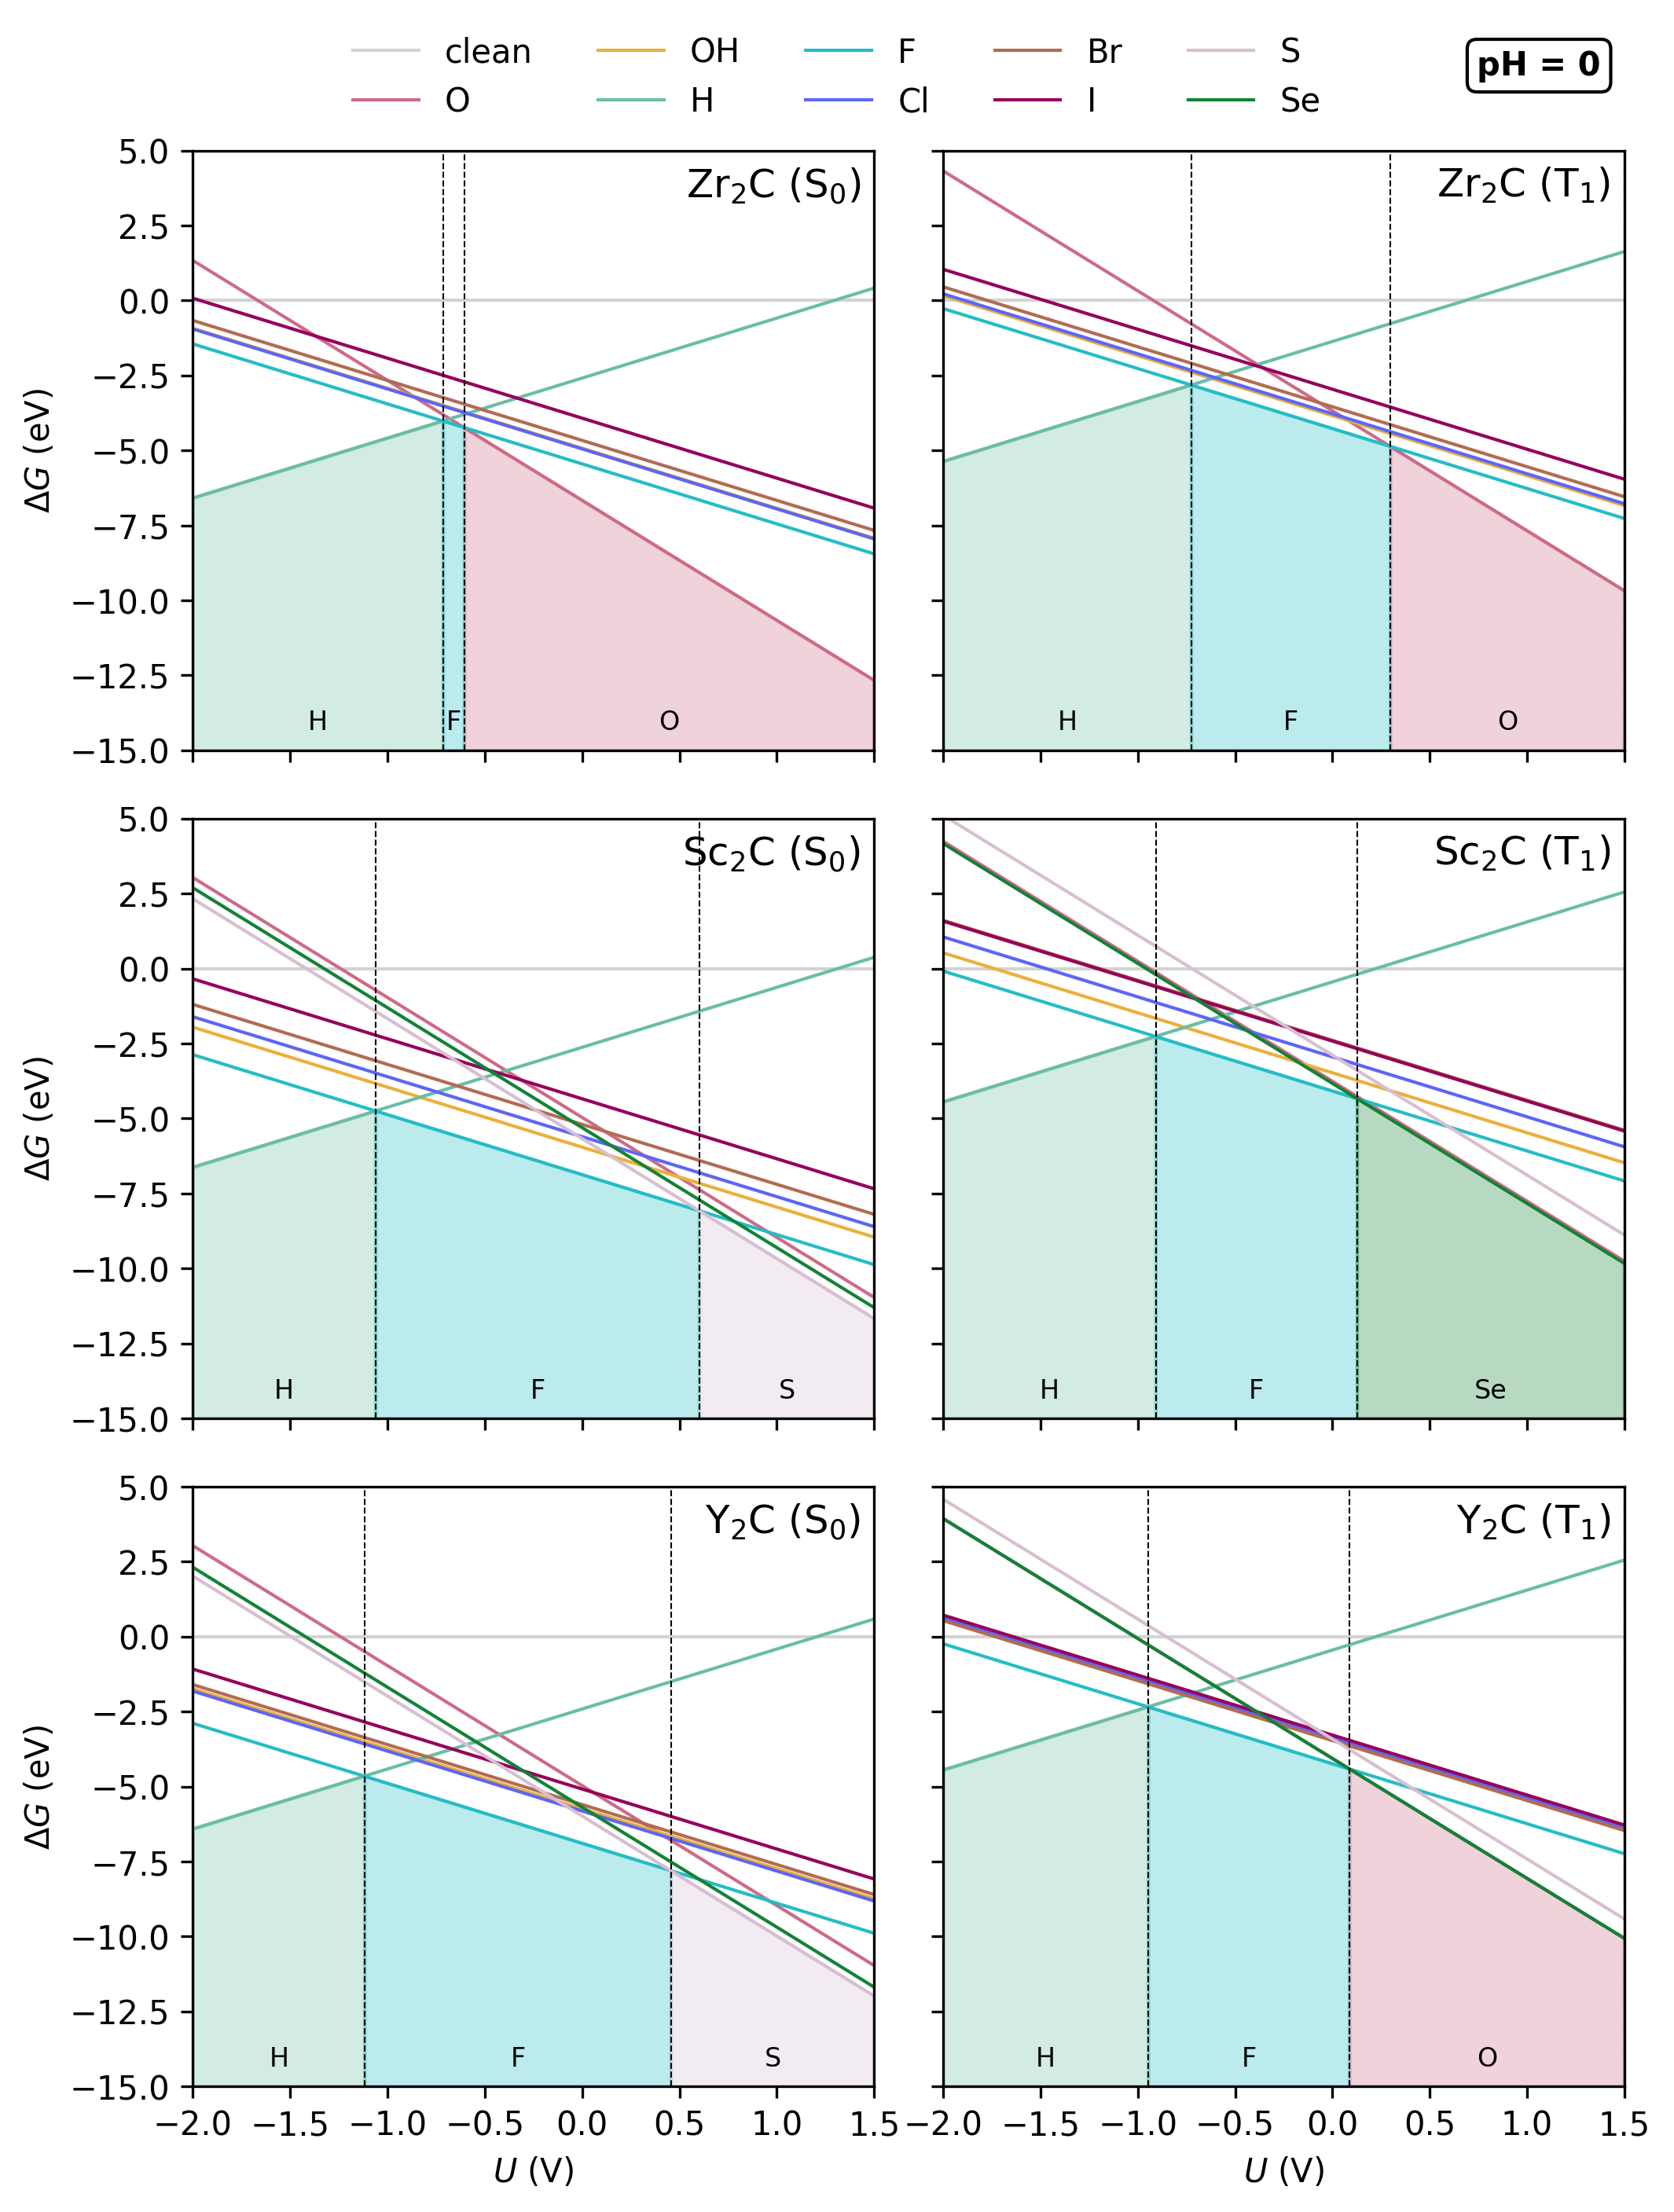

In [5]:
pH = 0      # or pH = 7

os.chdir("pbe0")

fig, ax = plt.subplots(3,2,figsize=(3.6*2, 3*3),sharey=True,sharex=True,dpi=300)

plot_dG_vs_U('data_zr_s.txt',ax=ax[0,0],pH=pH,xlabel=None,title="Zr$_2$C (S$_0$)")
plot_dG_vs_U('data_zr_t.txt',ax=ax[0,1],pH=pH,xlabel=None,ylabel=None,title="Zr$_2$C (T$_1$)")
plot_dG_vs_U('data_sc_s.txt',ax=ax[1,0],pH=pH,xlabel=None,title="Sc$_2$C (S$_0$)")
plot_dG_vs_U('data_sc_t.txt',ax=ax[1,1],pH=pH,xlabel=None,ylabel=None,title="Sc$_2$C (T$_1$)")
plot_dG_vs_U('data_y_s.txt',ax=ax[2,0],pH=pH,title="Y$_2$C (S$_0$)")
plot_dG_vs_U('data_y_t.txt',ax=ax[2,1],pH=pH,ylabel=None,title="Y$_2$C (T$_1$)")
fig.tight_layout(w_pad=1)

# Put legend on top of all subplots
handles, labels = ax[2,1].get_legend_handles_labels()
fig.legend(handles, labels,
           loc="upper center", ncol=5, fontsize="medium",
           frameon=False, bbox_to_anchor=(0.5, 1.045))
fig.text(0.95, 1.025, f"pH = {pH}",
         ha="right", va="top",
         fontsize=10, fontweight="bold",
         bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))
fig.tight_layout(w_pad=0.1)

os.chdir("..")

fig.savefig(f"./img/dG_pH{pH}.png", dpi=600,bbox_inches="tight")

### $\Delta G$ $vs.$ $\mathrm{pH}$ Plots (PBE0) at fixed $U$

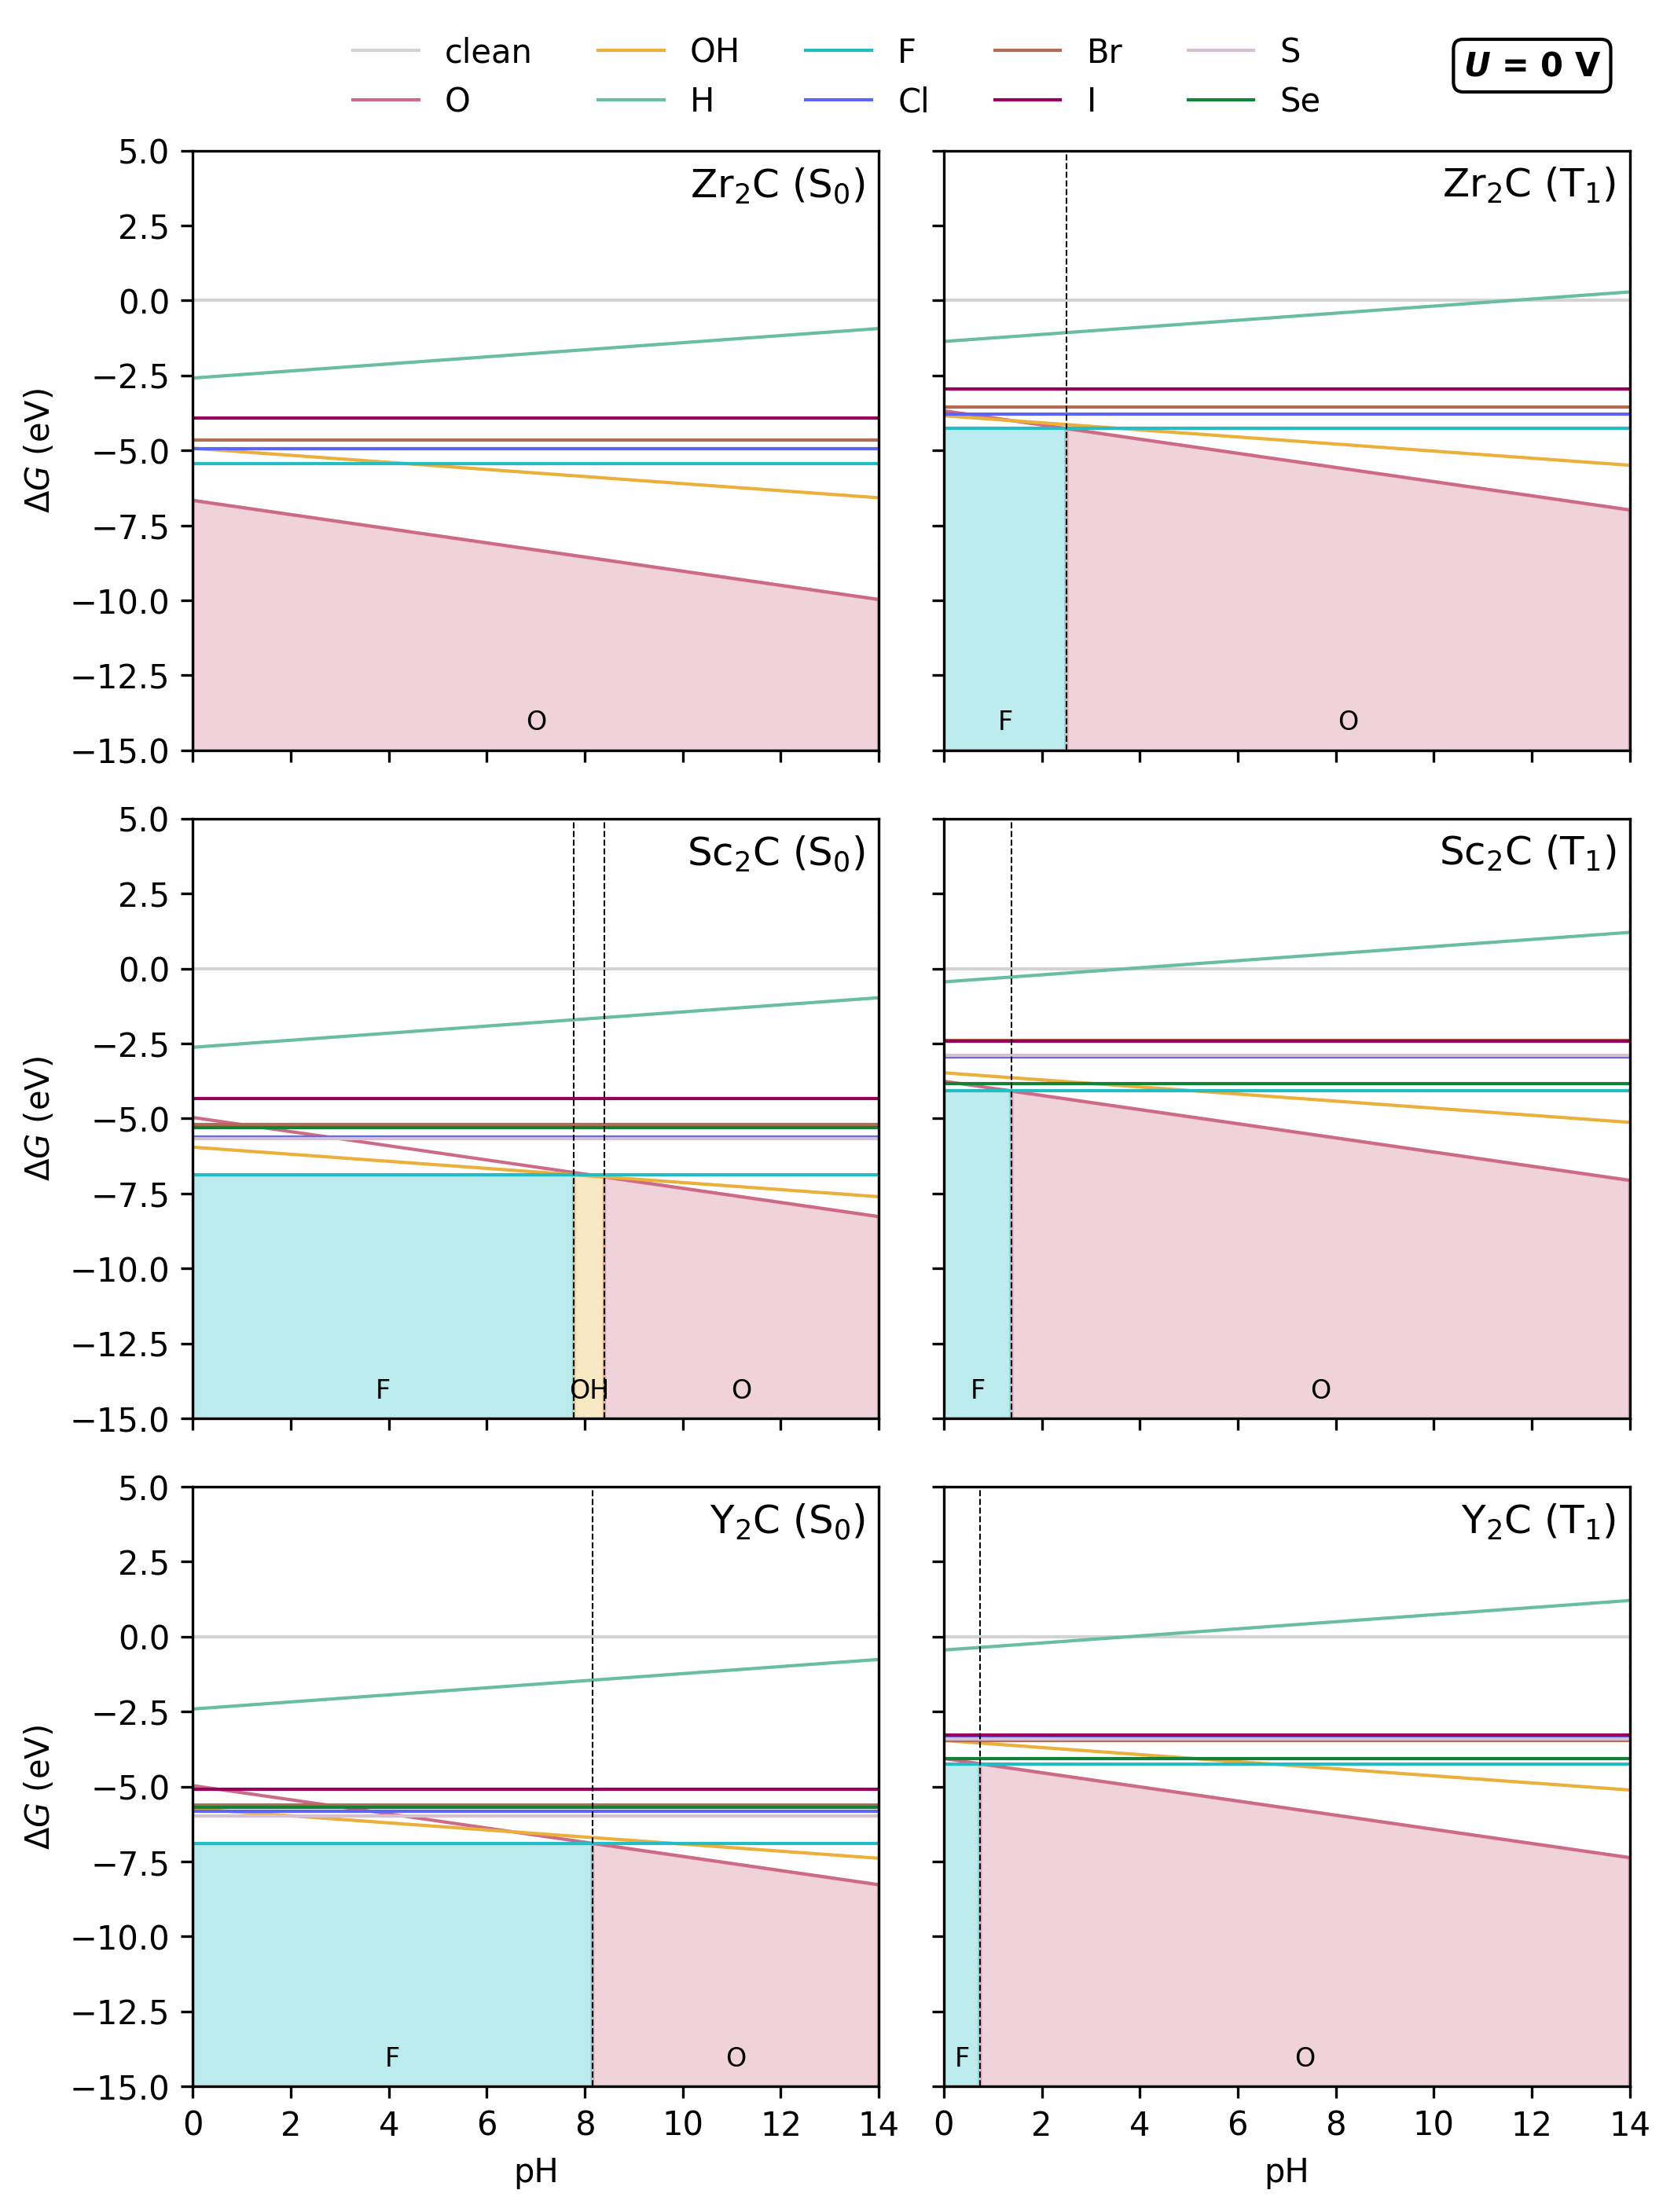

In [10]:
U = 0   # or U = 1.23

os.chdir("pbe0")

fig, ax = plt.subplots(3,2,figsize=(3.6*2, 3*3),sharey=True,sharex=True,dpi=300)
plot_dG_vs_pH('data_zr_s.txt',ax=ax[0,0],U=U,xlabel=None,title="Zr$_2$C (S$_0$)")
plot_dG_vs_pH('data_zr_t.txt',ax=ax[0,1],U=U,xlabel=None,ylabel=None,title="Zr$_2$C (T$_1$)")
plot_dG_vs_pH('data_sc_s.txt',ax=ax[1,0],U=U,xlabel=None,title="Sc$_2$C (S$_0$)")
plot_dG_vs_pH('data_sc_t.txt',ax=ax[1,1],U=U,xlabel=None,ylabel=None,title="Sc$_2$C (T$_1$)")
plot_dG_vs_pH('data_y_s.txt',ax=ax[2,0],U=U,title="Y$_2$C (S$_0$)")
plot_dG_vs_pH('data_y_t.txt',ax=ax[2,1],U=U,ylabel=None,title="Y$_2$C (T$_1$)")

# Put legend on top of all subplots
handles, labels = ax[2,1].get_legend_handles_labels()
fig.legend(handles, labels,
           loc="upper center", ncol=5, fontsize="medium",
           frameon=False, bbox_to_anchor=(0.5, 1.045))
fig.text(0.95, 1.025, "$\\mathbfit{U}$"+f" = {U} V",
         ha="right", va="top",
         fontsize=10, fontweight="bold",
         bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))
fig.tight_layout(w_pad=1)

os.chdir("..")

fig.savefig(f"./img/dG_U{U}.png", dpi=600,bbox_inches="tight")